In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Breast Cancer Data.csv")
print(data.head())
data.shape

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


(569, 33)

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#Exploratory Data Analysis

- Extracting basic information about the dataset 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Determine if any null values in the data set
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

###Heatmap indicating null values in the Dataset

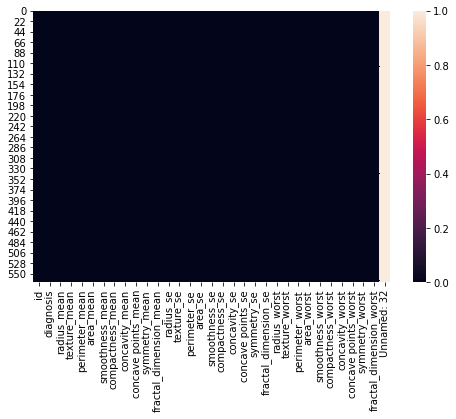

In [ ]:
plt.figure(figsize=(8,5))
plt.show(sns.heatmap(data.isnull()))

- As, we have all the 569 entries of unnamed: 32 column as NULL, We can drop that column.

In [ ]:
data_new = data.drop(labels= 'Unnamed: 32', axis=1)
print(data_new.head())
print(data_new.info())
print(data_new.shape)

         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          56

###LabelEncoding

- One column, 'diagnosis' is of type Object, which is not acceptable and thus we need to change it to int64 or float64

First, check the no. of unique values of that column.

In [ ]:
data_new['diagnosis'].unique()

array(['M', 'B'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


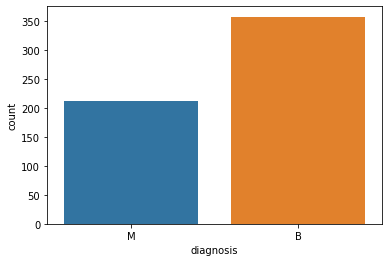

In [ ]:
sns.countplot(data_new['diagnosis'])

We have 2 unique values 1 as M and the 2nd is B. So, we will apply the One Hot Encode / get dummies function of pandas technique to convert this object datatype column to int.

In [ ]:
le = LabelEncoder()
data_new['diagnosis'] = le.fit_transform(data_new.loc[:, 'diagnosis'])

After encoding - 0 represents:  **"B"** and 1 represents: **"M"**

In [ ]:
print(data_new.head())
data_new.shape

         id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302          1  ...          0.4601                  0.11890
1    842517          1  ...          0.2750                  0.08902
2  84300903          1  ...          0.3613                  0.08758
3  84348301          1  ...          0.6638                  0.17300
4  84358402          1  ...          0.2364                  0.07678

[5 rows x 32 columns]


(569, 32)

In [ ]:
data_new.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data_new.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###Correlation between different features

In [ ]:
a = data_new.corr() 
a

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


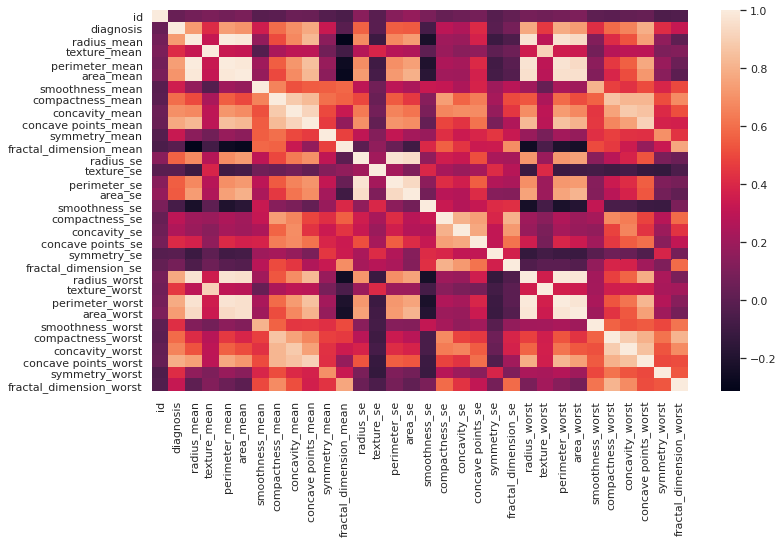

In [ ]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(a)

###Outliers

- Now, We detect Outliers and try to remove them

In [ ]:
z = np.abs(stats.zscore(data_new))
print(z)

[[0.23640517 1.29767572 1.09706398 ... 2.29607613 2.75062224 1.93701461]
 [0.23640344 1.29767572 1.82982061 ... 1.0870843  0.24388967 0.28118999]
 [0.43174109 1.29767572 1.57988811 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.23572747 1.29767572 0.70228425 ... 0.41406869 1.10454895 0.31840916]
 [0.23572517 1.29767572 1.83834103 ... 2.28998549 1.91908301 2.21963528]
 [0.24240586 0.77060855 1.80840125 ... 1.74506282 0.04813821 0.75120669]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
        12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
        42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
        78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
       108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       138, 138, 146, 146, 146, 150, 151, 151, 151, 152, 152, 152, 152,
       152, 152, 176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181,
       190, 190, 190, 190, 190, 192, 202, 203, 210, 212, 212, 212, 212,
       212, 212, 212, 213, 213, 213, 213, 213, 213, 219, 219, 232, 236,
       236, 239, 239, 258, 258, 258, 259, 259, 265, 265, 265, 265, 265,
       288, 288, 290, 290, 314, 314, 318, 323, 339, 339, 345, 351, 352,
       352, 352, 352, 352, 352, 352, 352, 359, 360, 368, 368, 370, 376,
       376, 376, 379, 379, 379, 388, 389, 400, 416, 417, 417, 4

In [ ]:
data_new_o = data_new[(z < 3).all(axis=1)]
data_new_o.shape

(487, 32)

In [ ]:
data_new_o

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.02678,0.02071,0.01626,0.02080,0.005304,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


From the above output we see that new dataframe has 487 rows which was initially 569.

###Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e50804588>,
      dtype=object)

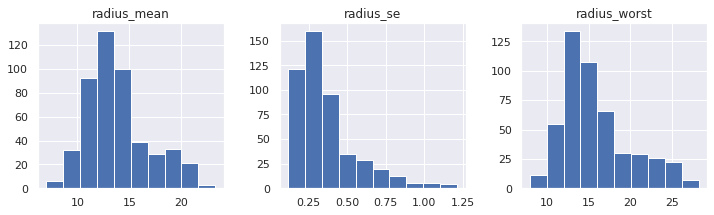

In [ ]:
radius_info = ['radius_mean', 'radius_se', 'radius_worst']
data_new_o[radius_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4e89b898>,
      dtype=object)

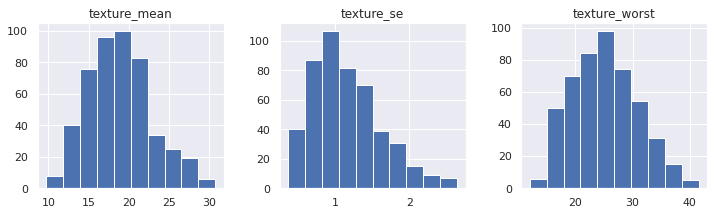

In [ ]:
texture_info = ['texture_mean', 'texture_se', 'texture_worst'] 
data_new_o[texture_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4e88d978>,
      dtype=object)

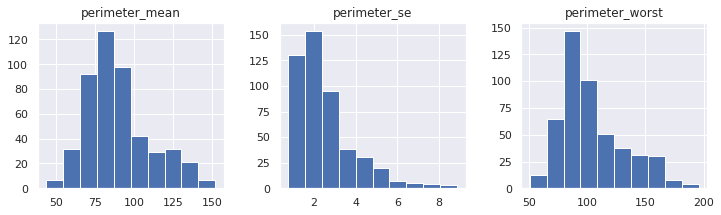

In [ ]:
perimeter_info = ['perimeter_mean', 'perimeter_se', 'perimeter_worst']
data_new_o[perimeter_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4e698358>,
      dtype=object)

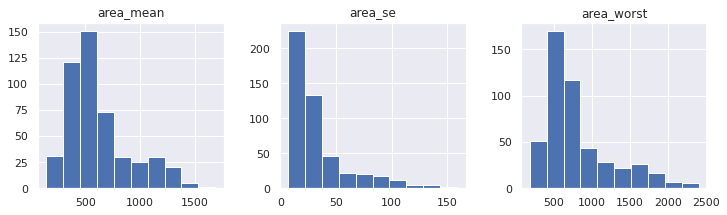

In [ ]:
area_info = ['area_mean', 'area_se', 'area_worst']
data_new_o[area_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4e63d160>,
      dtype=object)

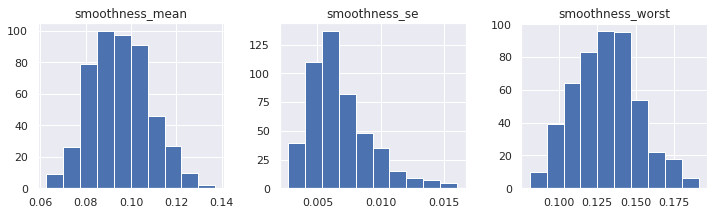

In [ ]:
smoothness_info = ['smoothness_mean', 'smoothness_se', 'smoothness_worst']
data_new_o[smoothness_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4e0ec3c8>,
      dtype=object)

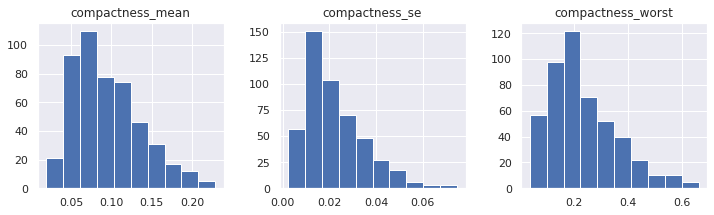

In [ ]:
compactness_info = ['compactness_mean', 'compactness_se', 'compactness_worst']
data_new_o[compactness_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4df51588>,
      dtype=object)

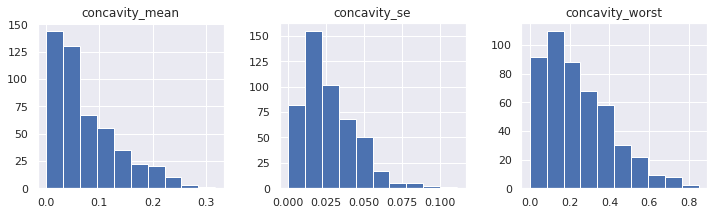

In [ ]:
concavity_info = ['concavity_mean', 'concavity_se', 'concavity_worst']
data_new_o[concavity_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4dd253c8>,
      dtype=object)

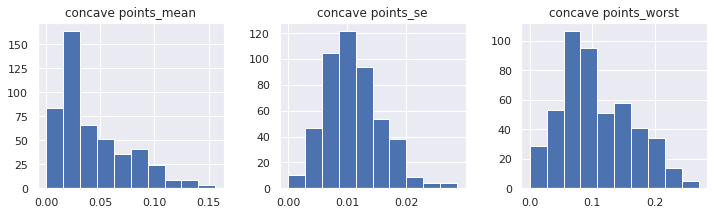

In [ ]:
concave_points_info = ['concave points_mean', 'concave points_se', 'concave points_worst']
data_new_o[concave_points_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4deec748>,
      dtype=object)

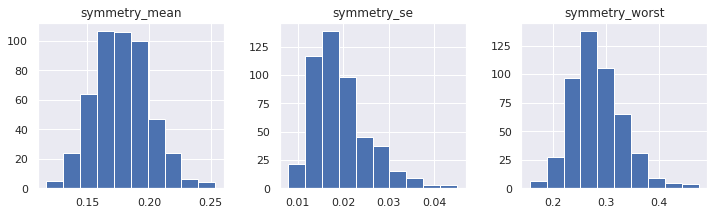

In [ ]:
symmetry_info = ['symmetry_mean', 'symmetry_se', 'symmetry_worst']
data_new_o[symmetry_info].hist(layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4d980940>,
      dtype=object)

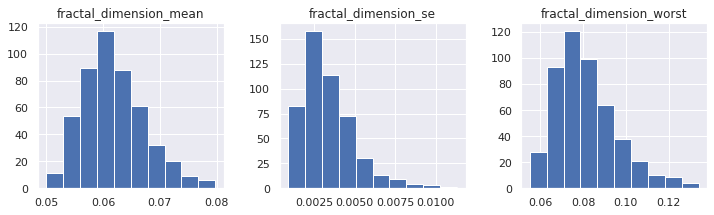

In [ ]:
fractal_dimension_info = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
data_new_o[fractal_dimension_info].hist(layout=(2,3))

- Storing the new data frame into a csv sheet

In [ ]:
data_new_o.to_csv('Cleaned_data_Breast_Cancer.csv', index=False)